In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [3]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [5]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [11]:

model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.1379 - loss: 2.3362 - val_accuracy: 0.2881 - val_loss: 2.2518
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.3347 - loss: 2.2402 - val_accuracy: 0.5069 - val_loss: 2.1920
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.4646 - loss: 2.1780 - val_accuracy: 0.4996 - val_loss: 2.1108
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5249 - loss: 2.0903 - val_accuracy: 0.6023 - val_loss: 1.9937
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.5910 - loss: 1.9660 - val_accuracy: 0.6142 - val_loss: 1.8334
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.6179 - loss: 1.8009 - val_accuracy: 0.6526 - val_loss: 1.6415
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.6512 - loss: 1.6115 - val_accuracy: 0.6742 - val_loss: 1.4466
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6798 - loss: 1.4220 - 

In [15]:

predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       980
           1       0.78      0.99      0.87      1135
           2       0.85      0.76      0.80      1032
           3       0.63      0.81      0.71      1010
           4       0.71      0.75      0.73       982
           5       0.83      0.34      0.49       892
           6       0.84      0.86      0.85       958
           7       0.80      0.87      0.83      1028
           8       0.81      0.60      0.69       974
           9       0.67      0.63      0.65      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



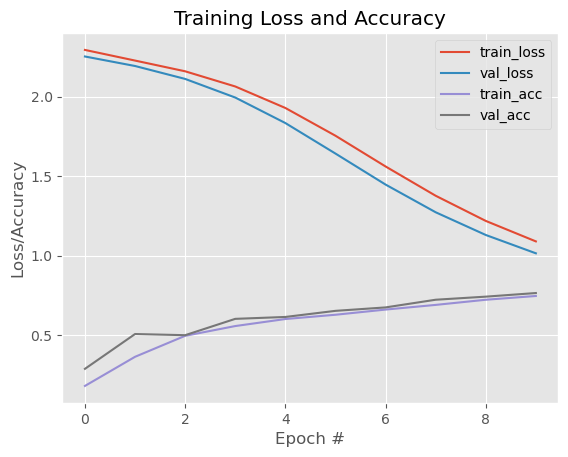

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()